# An analysis of cafes on Yelp
This is a quick clean-up and analysis of a subset of businesses on Yelp that include the categories "Cafes" and "Coffee & Tea". I have sampled the data and saved them into CSV files in a previous notebook.

The `attributes` column holds a lot of details on each business, and needs to be unpacked into separate columns for ease of use. Since we're focusing on cafes, a few select attributes that pertain to cafes and coffee shops will need to be picked. The `stars` column is used to gauge favorability of a business, i.e., the higher the star rating, the better.


In [1]:
import pandas as pd
import matplotlib
from pandas import Series, DataFrame
import seaborn as sns

In [2]:
#seaborn settings
sns.set_palette('deep',desat=0.6)
sns.set_context(rc={'figure.figsize':(8,4)})

In [3]:
cafes = DataFrame.from_csv('yelp_cafes.csv')
reviews = DataFrame.from_csv('yelp_cafe_reviews.csv')

### Ratings on Yelp for cafes
A quick histogram shows a positively skewed normal distribution of star ratings for cafes.

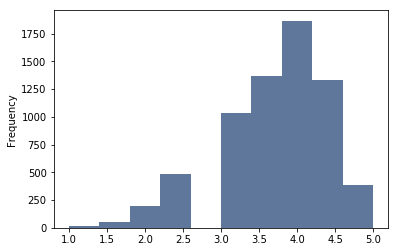

In [4]:
%matplotlib inline
cafes.stars.plot(kind='hist', bins=10)
pass

The `attributes` column has around 40 attributes, still sitting in JSON format, that need to be read into their own individual columns. 

In [5]:
cafes = cafes.set_index('business_id')

In [6]:
cafes.attributes[0]

'[\'BusinessAcceptsCreditCards: True\', \'GoodForKids: True\', "GoodForMeal: {\'dessert\': False, \'latenight\': False, \'lunch\': False, \'dinner\': False, \'breakfast\': False, \'brunch\': False}", \'RestaurantsAttire: casual\', \'RestaurantsDelivery: False\', \'RestaurantsGoodForGroups: True\', \'RestaurantsReservations: True\', \'RestaurantsTakeOut: False\']'

In [7]:
import re
cafe_attributes = cafes.attributes

#Replace the inner single quotes with doubple quotes, replace [] with {}, remove hyphens and other non-alphanumeric characters.
cafe_attributes = cafe_attributes.str.translate({ord(c): None for c in r'\'"-_'}).str.replace('[','{').str.replace(']','}')
cafe_attributes = DataFrame(cafe_attributes.apply(lambda x:re.sub(r'(\w+)',r'"\1"',str(x))))
cafe_attributes.head()

,attributes
business_id,
DNyYOxVAfu0oUcPNL1ljCQ,"{""BusinessAcceptsCreditCards"": ""True"", ""GoodFo..."
XxjrqA5jrzLH0EdCKUG9Mw,"{""BusinessAcceptsCreditCards"": ""False"", ""Busin..."
p4VrKw8CufwzBbvJkuLksQ,"{""BusinessParking"": {""garage"": ""False"", ""stree..."
hSep-C-1JSC8c_8tR96etQ,"{""BikeParking"": ""True"", ""BusinessAcceptsCredit..."
pmJqSsCfgbo3TxPWpQNLIw,"{""Ambience"": {""romantic"": ""False"", ""intimate"":..."


In [8]:
import json

#Convert string in attributes column to dict using json load.
cafe_attributes.attributes = cafe_attributes.attributes.apply(lambda x: json.loads(x))

#Convert column of dicts to columns in the dataframe
cafe_attributes = pd.concat([cafe_attributes['attributes'].apply(Series)], axis=1)

cafe_attributes.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexes/api.py:43: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexes/api.py:43: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  union = _union_indexes(indexes)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '>' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,Alcohol,Ambience,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,BusinessParking,Caters,CoatCheck,DietaryRestrictions,DogsAllowed,...,BYOB,BYOBCorkage,ByAppointmentOnly,BestNights,AgesAllowed,Open24Hours,Corkage,HairSpecializesIn,AcceptsInsurance,RestaurantsCounterService
business_id,,,,,,,,,,,,,,,,,,,,,
DNyYOxVAfu0oUcPNL1ljCQ,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XxjrqA5jrzLH0EdCKUG9Mw,NaN,NaN,NaN,NaN,False,"{'garage': 'False', 'street': 'True', 'validat...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p4VrKw8CufwzBbvJkuLksQ,NaN,NaN,NaN,NaN,NaN,"{'garage': 'False', 'street': 'False', 'valida...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hSep-C-1JSC8c_8tR96etQ,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pmJqSsCfgbo3TxPWpQNLIw,NaN,"{'romantic': 'False', 'intimate': 'False', 'cl...",False,NaN,True,"{'garage': 'False', 'street': 'False', 'valida...",False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The warnings generated in the above cell are due to `.apply(Series)` which creates a column '0'. Once the tables are joined, I can safely get rid of this column.

In [9]:
# cafe_attributes.columns = cafe_attributes.columns.astype('str')
# cafe_attributes.drop(['0'],axis=1, inplace=True)
cafe_attributes.columns


Index([                   'Alcohol',                   'Ambience',
                      'BikeParking',     'BusinessAcceptsBitcoin',
       'BusinessAcceptsCreditCards',            'BusinessParking',
                           'Caters',                  'CoatCheck',
              'DietaryRestrictions',                'DogsAllowed',
                        'DriveThru',             'GoodForDancing',
                      'GoodForKids',                'GoodForMeal',
                        'HappyHour',                      'HasTV',
                            'Music',                 'NoiseLevel',
                   'OutdoorSeating',          'RestaurantsAttire',
              'RestaurantsDelivery',   'RestaurantsGoodForGroups',
           'RestaurantsPriceRange2',    'RestaurantsReservations',
          'RestaurantsTableService',         'RestaurantsTakeOut',
                          'Smoking',       'WheelchairAccessible',
                             'WiFi',                          

In [10]:
cafes = cafes.join(cafe_attributes)


In [11]:
cafes.columns

Index([                   'address',                 'attributes',
                       'categories',                       'city',
                            'hours',                    'is_open',
                         'latitude',                  'longitude',
                             'name',               'neighborhood',
                      'postal_code',               'review_count',
                            'stars',                      'state',
                             'type',                    'Alcohol',
                         'Ambience',                'BikeParking',
           'BusinessAcceptsBitcoin', 'BusinessAcceptsCreditCards',
                  'BusinessParking',                     'Caters',
                        'CoatCheck',        'DietaryRestrictions',
                      'DogsAllowed',                  'DriveThru',
                   'GoodForDancing',                'GoodForKids',
                      'GoodForMeal',                  'HappyHo

There are some columns that are still `dict`s and will need to be unpacked, like `BusinessParking`, `Music` and `Ambience`

## Choosing the right attributes for cafes
A possible list of attributes for cafes from the above could include:
1. WiFi
2. NoiseLevel
3. DogsAllowed
4. DriveThru
5. Alcohol

Let's look at the distribution of stars by each of these attributes

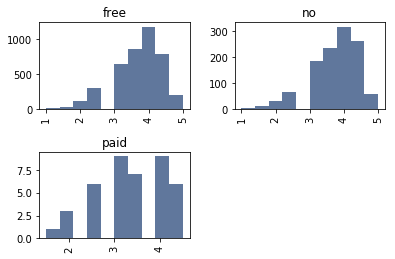

In [12]:
cafes.stars.hist(by=cafes.WiFi)
pass

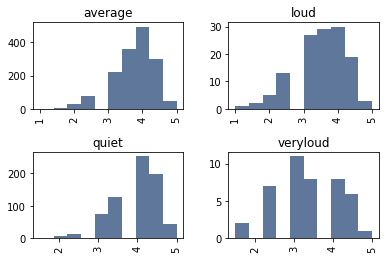

In [13]:
cafes.stars.hist(by=cafes.NoiseLevel)
pass

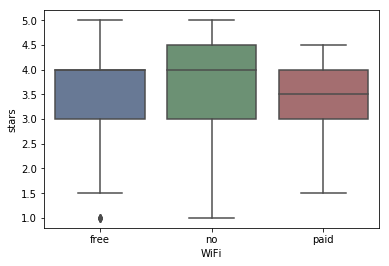

In [14]:
sns.boxplot(y = cafes.stars, x = cafes.WiFi)
pass

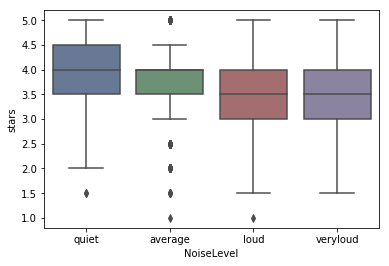

In [15]:
sns.boxplot(y = cafes.stars, x = cafes.NoiseLevel)
pass

## Quieter = Better?
The above boxplot shows that cafes that are quieter score a better star rating. What about cafes that play music? To find out, we'll need to look at the `Music` attribute. Since the values in this column are `dict`s, we'll need to repeat the same unpacking process as that for the `attributes` column.

In [16]:
music_attributes = pd.concat([cafes['Music'].apply(Series)], axis=1)
music_attributes.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexes/api.py:43: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  union = _union_indexes(indexes)


,0,backgroundmusic,dj,jukebox,karaoke,live,nomusic,video
business_id,,,,,,,,
DNyYOxVAfu0oUcPNL1ljCQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XxjrqA5jrzLH0EdCKUG9Mw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p4VrKw8CufwzBbvJkuLksQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hSep-C-1JSC8c_8tR96etQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pmJqSsCfgbo3TxPWpQNLIw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Still trying to debug this!

In [17]:
cafes = cafes.join(music_attributes)

ValueError: columns overlap but no suffix specified: Index([0], dtype='object')

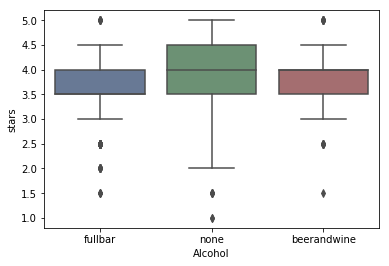

In [14]:
sns.boxplot(y = cafes.stars, x = cafes.Alcohol)
pass

Looks like places that serve coffee are better off just sticking to coffee than serve alcohol as well, although I can think of a few places that serve both in Portland!

These boxplots, while allowing me to compare over a categorical value column, do not show any information on how many records have each of those values. So what plots should I try next?

### Review counts
When looking up businesses on Yelp, the number of reviews a business has received is a good indication of how popular the establishment is. When both review count and star rating are high, the business is in good standing, in other words, is relatively favorable. My next step is to bring review counts into the picture. What are the best ways to get a decent idea of how the attributes we just unpacked influence review counts?